<a href="https://colab.research.google.com/github/fjme95/python-para-la-ciencia-de-datos/blob/main/Semana%2010/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [1]:
!pip install -U plotly

In [2]:
import pandas as pd
import numpy as np

import datetime

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

from pprint import pprint

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio

In [3]:
pio.templates.default = 'plotly_white'

# Datos

Datos originales: http://www3.dsi.uminho.pt/pcortez/data/itraffic.html

In [4]:
internet_traffic = pd.read_csv('http://www3.dsi.uminho.pt/pcortez/data/A5M.csv', names = ['bits'])
internet_traffic['datetime'] = pd.date_range(datetime.datetime(2005,6,7,6,57), periods=len(internet_traffic), freq='5min')
internet_traffic.set_index('datetime', inplace = True)
internet_traffic

,bits
datetime,
2005-06-07 06:57:00,106868373810
2005-06-07 07:02:00,111306467130
2005-06-07 07:07:00,116324091090
2005-06-07 07:12:00,116290646130
2005-06-07 07:17:00,137476277430
...,...
2005-07-28 13:32:00,200827592970
2005-07-28 13:37:00,203874964740
2005-07-28 13:42:00,201891816240


In [5]:
px.line(internet_traffic)

# Stationarity

Se prueba estacionariedad en la serie de tiempo con la prueba Aumentada de Dickey-Fuller. La hipótesis nula es que la serie presenta no estacionariedad. La alternativa es que existe estacionariedad.

Para ejecutar la prueba en python, usamos [```adfuller```](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

In [7]:
adf_results = adfuller(internet_traffic.bits.values)
pprint(dict(zip(['Statistic', 'P-value', 'No. lags', 'Observations', 'Critical values'], adf_results)))

{'Critical values': {'1%': -3.4307940217206507,
                     '10%': -2.566874452864851,
                     '5%': -2.8617362381279796},
 'No. lags': 41,
 'Observations': 14730,
 'P-value': 3.418229435914419e-24,
 'Statistic': -12.948322539959905}


Como el $\text{p-value} = 3.41\times 10^{-41} << 0.05$, rechazamos la hipótesis nula. Es decir, no hay evidencia estadística para suponer que la serie no es estacionaria.

# Descomposición

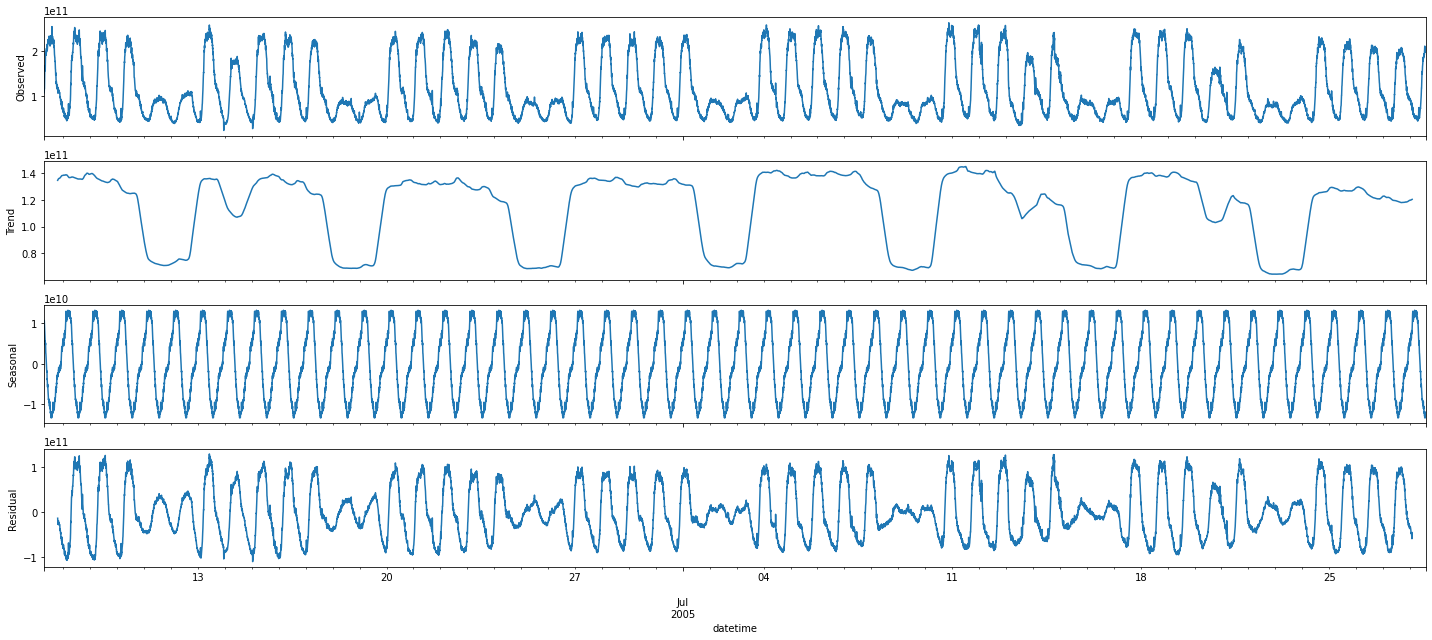

In [9]:
decomposition  = sm.tsa.seasonal_decompose(internet_traffic, freq = ((24*60)//5))

plt.rcParams["figure.figsize"] = (20,9)
fig = decomposition.plot()
fig.show()

# Autocorrelación

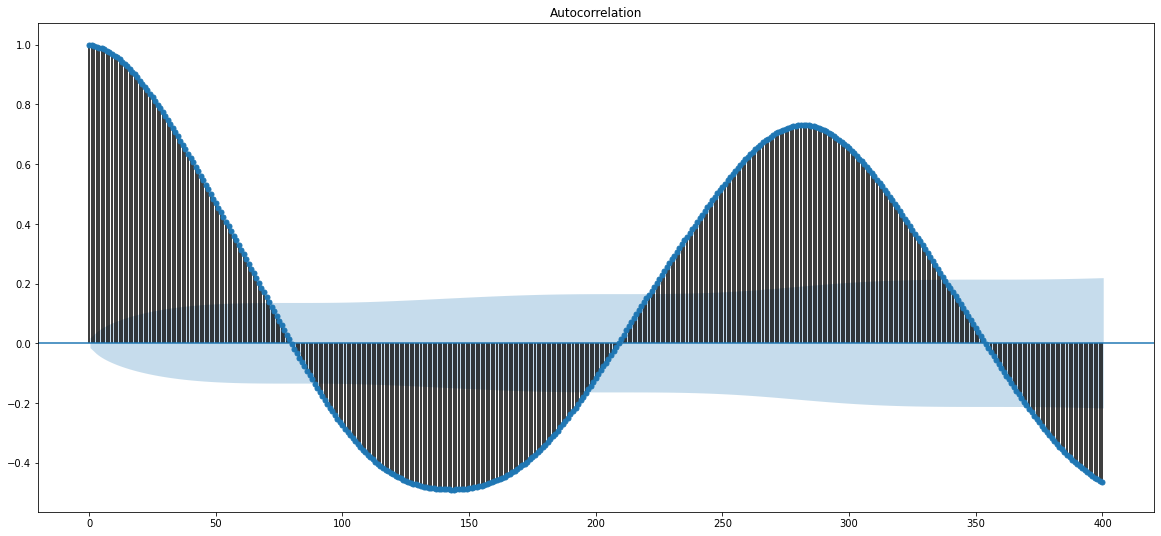

In [10]:
tsaplots.plot_acf(internet_traffic.bits.values, lags = 400)
plt.show()

# Autocorrelación parcial

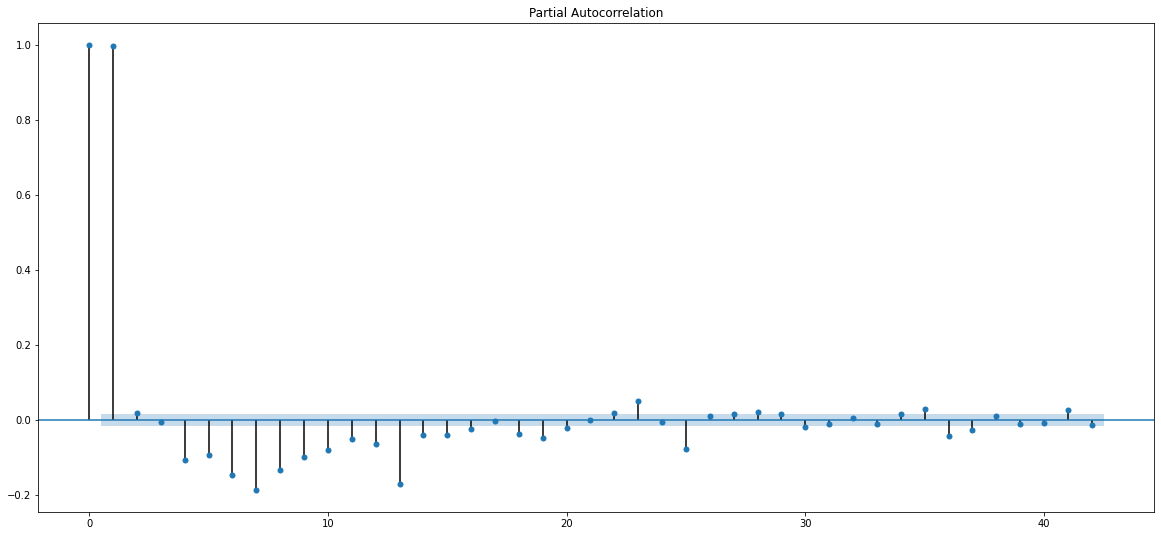

In [11]:
tsaplots.plot_pacf(internet_traffic.bits.values)
plt.show()

# ARIMA

In [12]:
import itertools

In [13]:
p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))

In [14]:
model = list()
aic = list()

for param in pdq:
  try:
      mod = SARIMAX(internet_traffic.bits.values,
                    order=param,
                    enforce_stationarity=False)
      results = mod.fit()
      model.append(param)
      aic.append(results.aic)
      print('ARIMA{}- AIC:{}'.format(param, results.aic))
  except:
    print('')
    print('Error')
    continue

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)- AIC:6.110089189594635e+21
ARIMA(0, 0, 1)- AIC:787282.9209187159
ARIMA(0, 0, 2)- AIC:784591.7245646395


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(0, 0, 3)- AIC:783813.7291022287
ARIMA(0, 0, 4)- AIC:783499.7096436128
ARIMA(0, 0, 5)- AIC:783331.4627338971
ARIMA(0, 1, 0)- AIC:13473409.33281345
ARIMA(0, 1, 1)- AIC:696930.1556071895
ARIMA(0, 1, 2)- AIC:696885.025832181
ARIMA(0, 1, 3)- AIC:696681.6017249734
ARIMA(0, 1, 4)- AIC:696519.3009083553
ARIMA(0, 1, 5)- AIC:696204.213157976


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)- AIC:3.641877798415029e+27
ARIMA(0, 2, 1)- AIC:697132.7013608941
ARIMA(0, 2, 2)- AIC:696413.7859121431
ARIMA(0, 2, 3)- AIC:695789.6822427603
ARIMA(0, 2, 4)- AIC:695573.4718273964
ARIMA(0, 2, 5)- AIC:695392.011403101
ARIMA(0, 3, 0)- AIC:30633038.21617712
ARIMA(0, 3, 1)- AIC:708613.6637759653
ARIMA(0, 3, 2)- AIC:701268.1151645423
ARIMA(0, 3, 3)- AIC:700096.3584056742
ARIMA(0, 3, 4)- AIC:698947.890464184
ARIMA(0, 3, 5)- AIC:698405.492669971


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)- AIC:nan
ARIMA(0, 4, 1)- AIC:724389.297994025
ARIMA(0, 4, 2)- AIC:713102.4199834536
ARIMA(0, 4, 3)- AIC:706504.5151960028
ARIMA(0, 4, 4)- AIC:703999.3788998612
ARIMA(0, 4, 5)- AIC:702873.1600018865
ARIMA(0, 5, 0)- AIC:67622539.0405963
ARIMA(0, 5, 1)- AIC:742181.1052360944
ARIMA(0, 5, 2)- AIC:730468.5719208096
ARIMA(0, 5, 3)- AIC:716866.1883403931
ARIMA(0, 5, 4)- AIC:711739.727092121
ARIMA(0, 5, 5)- AIC:710453.727256599
ARIMA(1, 0, 0)- AIC:697028.2538984545
ARIMA(1, 0, 1)- AIC:696976.755408878
ARIMA(1, 0, 2)- AIC:696930.0541633845
ARIMA(1, 0, 3)- AIC:696750.3130750344
ARIMA(1, 0, 4)- AIC:696573.6092987261
ARIMA(1, 0, 5)- AIC:696250.5929655584
ARIMA(1, 1, 0)- AIC:696977.6726409856
ARIMA(1, 1, 1)- AIC:696471.3303754737
ARIMA(1, 1, 2)- AIC:695889.5811533139
ARIMA(1, 1, 3)- AIC:695331.2018978779
ARIMA(1, 1, 4)- AIC:695182.6203884364
ARIMA(1, 1, 5)- AIC:695034.5027736354
ARIMA(1, 2, 0)- AIC:702980.1851273583
ARIMA(1, 2, 1)- AIC:696810.4039203676
ARIMA(1, 2, 2)- AIC:696675.9185

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 5, 5)- AIC:712036.7660803839
ARIMA(3, 0, 0)- AIC:696930.7295865623
ARIMA(3, 0, 1)- AIC:696924.5460783145
ARIMA(3, 0, 2)- AIC:696478.1316014015
ARIMA(3, 0, 3)- AIC:695835.5245470623
ARIMA(3, 0, 4)- AIC:695413.1086063471


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 5)- AIC:695402.3147442697
ARIMA(3, 1, 0)- AIC:696723.5619493573
ARIMA(3, 1, 1)- AIC:695573.3680972176
ARIMA(3, 1, 2)- AIC:695478.9366048842
ARIMA(3, 1, 3)- AIC:695299.475588924
ARIMA(3, 1, 4)- AIC:695107.1454985105
ARIMA(3, 1, 5)- AIC:694956.9144427513
ARIMA(3, 2, 0)- AIC:698948.7619384445
ARIMA(3, 2, 1)- AIC:696213.7438341347
ARIMA(3, 2, 2)- AIC:695909.5516171686
ARIMA(3, 2, 3)- AIC:695676.6984551975


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)- AIC:695390.2314912127
ARIMA(3, 2, 5)- AIC:695142.2416085133
ARIMA(3, 3, 0)- AIC:707549.0956082414
ARIMA(3, 3, 1)- AIC:702241.5215474078
ARIMA(3, 3, 2)- AIC:699802.1166533729
ARIMA(3, 3, 3)- AIC:699000.5374522742
ARIMA(3, 3, 4)- AIC:698644.4935311647


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 5)- AIC:698071.8565592237
ARIMA(3, 4, 0)- AIC:717998.6677313963
ARIMA(3, 4, 1)- AIC:711340.8035190839
ARIMA(3, 4, 2)- AIC:705732.9181065661
ARIMA(3, 4, 3)- AIC:703982.911907157
ARIMA(3, 4, 4)- AIC:702820.374682906
ARIMA(3, 4, 5)- AIC:702087.3192908177
ARIMA(3, 5, 0)- AIC:729919.2411774719
ARIMA(3, 5, 1)- AIC:722277.0736099979
ARIMA(3, 5, 2)- AIC:714201.49230196
ARIMA(3, 5, 3)- AIC:710795.3659618571


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 5, 4)- AIC:708998.5460903426
ARIMA(3, 5, 5)- AIC:708926.9296875562
ARIMA(4, 0, 0)- AIC:696721.602236196
ARIMA(4, 0, 1)- AIC:695851.9572149392
ARIMA(4, 0, 2)- AIC:695941.1199417296
ARIMA(4, 0, 3)- AIC:695925.7310914536


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)- AIC:695549.4207638898


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 5)- AIC:695279.5143733232
ARIMA(4, 1, 0)- AIC:696528.1144220755
ARIMA(4, 1, 1)- AIC:695380.6563007396
ARIMA(4, 1, 2)- AIC:695359.8536814026
ARIMA(4, 1, 3)- AIC:695193.2386080269


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)- AIC:695073.4533043781


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 5)- AIC:694891.6259100339
ARIMA(4, 2, 0)- AIC:697751.2815130807
ARIMA(4, 2, 1)- AIC:695733.6836733167
ARIMA(4, 2, 2)- AIC:695581.7190273807
ARIMA(4, 2, 3)- AIC:695561.1869359673


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)- AIC:695294.5263780646


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 5)- AIC:695184.380864876
ARIMA(4, 3, 0)- AIC:705592.1257138762
ARIMA(4, 3, 1)- AIC:700852.1590521794
ARIMA(4, 3, 2)- AIC:699139.7610469548
ARIMA(4, 3, 3)- AIC:698870.1672610401


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)- AIC:698381.2503400855


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 5)- AIC:697931.2403531041


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)- AIC:715141.4385425088
ARIMA(4, 4, 1)- AIC:709129.8277167737
ARIMA(4, 4, 2)- AIC:704918.1157660556
ARIMA(4, 4, 3)- AIC:704151.1345021734
ARIMA(4, 4, 4)- AIC:702650.7710587838
ARIMA(4, 4, 5)- AIC:701902.3650634397
ARIMA(4, 5, 0)- AIC:725888.4246500436
ARIMA(4, 5, 1)- AIC:718985.7533285845
ARIMA(4, 5, 2)- AIC:712954.1911509766
ARIMA(4, 5, 3)- AIC:711999.7358509395
ARIMA(4, 5, 4)- AIC:708496.0669628112


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 5, 5)- AIC:707699.0770483505
ARIMA(5, 0, 0)- AIC:696525.0340289226
ARIMA(5, 0, 1)- AIC:696608.250103867


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 0, 2)- AIC:695586.733587137


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 0, 3)- AIC:695624.3129800216


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 0, 4)- AIC:695697.5298541377


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 0, 5)- AIC:695230.8641750267
ARIMA(5, 1, 0)- AIC:696163.2104630428
ARIMA(5, 1, 1)- AIC:695104.9583218611
ARIMA(5, 1, 2)- AIC:695061.2191564417


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 1, 3)- AIC:695039.0344450416


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 1, 4)- AIC:694991.2528444729


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 1, 5)- AIC:694897.6990829224
ARIMA(5, 2, 0)- AIC:696629.2262275547
ARIMA(5, 2, 1)- AIC:695419.6761857708
ARIMA(5, 2, 2)- AIC:695374.8992360733
ARIMA(5, 2, 3)- AIC:695351.6103595522


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 2, 4)- AIC:695283.9015696978


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 2, 5)- AIC:695098.0482139834
ARIMA(5, 3, 0)- AIC:703587.9143970013
ARIMA(5, 3, 1)- AIC:699501.5966410825
ARIMA(5, 3, 2)- AIC:698663.3340787339


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 3, 3)- AIC:698246.5400721552


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 3, 4)- AIC:698195.0462682485


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 3, 5)- AIC:697683.7650825952
ARIMA(5, 4, 0)- AIC:712553.1787090305
ARIMA(5, 4, 1)- AIC:707031.0089971825
ARIMA(5, 4, 2)- AIC:704200.34999574


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 4, 3)- AIC:702972.9838186183
ARIMA(5, 4, 4)- AIC:702290.8496472612


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 4, 5)- AIC:701534.6298982087
ARIMA(5, 5, 0)- AIC:722635.0161449059
ARIMA(5, 5, 1)- AIC:716271.736468437
ARIMA(5, 5, 2)- AIC:712117.8133481826


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 5, 3)- AIC:710353.7943715255


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 5, 4)- AIC:707780.8130017049


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(5, 5, 5)- AIC:707288.6770238797


In [15]:
df_models_a5m = pd.DataFrame(zip(model, aic), columns=['model', 'aic'])
df_models_a5m.sort_values('aic').head()

,model,aic
155,"(4, 1, 5)",694891.625910
191,"(5, 1, 5)",694897.699083
119,"(3, 1, 5)",694956.914443
190,"(5, 1, 4)",694991.252844
83,"(2, 1, 5)",694993.620285


In [16]:
models = pd.DataFrame(zip(model, aic), columns=['model', 'aic'])
models.sort_values('aic').head()

,model,aic
155,"(4, 1, 5)",694891.625910
191,"(5, 1, 5)",694897.699083
119,"(3, 1, 5)",694956.914443
190,"(5, 1, 4)",694991.252844
83,"(2, 1, 5)",694993.620285


# Mejor modelo

In [17]:
model = SARIMAX(internet_traffic,
                order=(4, 1, 5),
                enforce_stationarity=False)

results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 5T will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   bits   No. Observations:                14772
Model:               SARIMAX(4, 1, 5)   Log Likelihood             -347435.813
Date:                Mon, 24 Jan 2022   AIC                         694891.626
Time:                        22:20:24   BIC                         694967.626
Sample:                    06-07-2005   HQIC                        694916.861
                         - 07-28-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3277      0.024     13.780      0.000       0.281       0.374
ar.L2          0.0602      0.010      6.042      0.000       0.041       0.080
ar.L3          0.8075      0.009     89.852      0.000       0.790       0.825
ar.L4         -0.2728      0.023    -11.748      0.000      -0.318      -0.227
ma.L1         -0.4660      0.024    -19.594      0.000      -0.513      -0.419
ma.L2         -0.1206      0.012     -9.837      0.000      -0.145      -0.097
ma.L3         -0.7007      0.010    -68.079      0.000      -0.721      -0.681
ma.L4          0.4011      0.022     18.389      0.000       0.358       0.444
ma.L5          0.1130      0.010     11.574      0.000       0.094       0.132
sigma2       1.63e+19    1.9e-22   8.58e+40      0.000    1.63e+19    1.63e+19
===================================================================================
Ljung-Box (Q):                      616.11   Jarque-Bera (JB):             20801.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.62e+56. Standard errors may be unstable.
"""

## Predicciones

In [18]:
internet_traffic.shape[0] * .7

10340.4

In [21]:
start = internet_traffic.index[10341]
end = internet_traffic.index[-1]

In [31]:
pred = results.predict(start = start, end = end)
pred_ci = results.get_prediction(start = start, end = end).conf_int()

In [42]:
predictions = pd.concat([pd.DataFrame(pred, columns = ['bits']), pred_ci], axis = 1)
predictions

,bits,lower bits,upper bits
2005-07-13 04:42:00,7.957706e+10,7.166329e+10,8.749083e+10
2005-07-13 04:47:00,7.733935e+10,6.942558e+10,8.525312e+10
2005-07-13 04:52:00,7.834166e+10,7.042789e+10,8.625543e+10
2005-07-13 04:57:00,7.900017e+10,7.108640e+10,8.691394e+10
2005-07-13 05:02:00,7.819119e+10,7.027742e+10,8.610496e+10
...,...,...,...
2005-07-28 13:32:00,2.032911e+11,1.953774e+11,2.112049e+11
2005-07-28 13:37:00,2.031414e+11,1.952276e+11,2.110551e+11
2005-07-28 13:42:00,2.041755e+11,1.962618e+11,2.120893e+11
2005-07-28 13:47:00,2.025797e+11,1.946660e+11,2.104935e+11


In [74]:
# px.line(predictions) # Mejorar para que graficar ribbon en lugar de lineas

In [57]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = internet_traffic.index, y = internet_traffic.bits, name = 'real')) \
    .add_trace(go.Scatter(x = predictions.index, y = predictions.bits, name = 'predicción')) \
    .add_trace(go.Scatter(
        name='Límite superior',
        x=predictions.index,
        y=predictions['upper bits'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )) \
    .add_trace(go.Scatter(
        name='Límite inferior',
        x=predictions.index,
        y=predictions['lower bits'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False)
    ) \
    .update_layout(hovermode="x")

## Proyección

In [73]:

n_steps = 500
pred_uc = results.get_forecast(steps=n_steps)
pred_ci = pred_uc.conf_int()

pred_x = pd.date_range(internet_traffic.index[-1], periods=n_steps, freq='5min')

fig = go.Figure()

fig.add_trace(go.Scatter(x = internet_traffic.index, y = internet_traffic.bits, name = 'real')) \
    .add_trace(go.Scatter(x = pred_x, y = pred_uc.predicted_mean, name = 'proyección')) \
    .add_trace(go.Scatter(
        name='Límite superior',
        x= pred_x,
        y=pred_ci['upper bits'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )) \
    .add_trace(go.Scatter(
        name='Límite inferior',
        x=pred_x,
        y=pred_ci['lower bits'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False)
    ) \
    .update_layout(hovermode="x")
